This notebook is JUST for experimental constraints bar graphs/tables (uses the BIG dataframe). All other anlaysis goes in the main notebook

In [1]:
from copy import deepcopy
from contextlib import contextmanager

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm, Normalize
import matplotlib.gridspec as gridspec
from itertools import izip
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, MultipleLocator
from collections import namedtuple
from IPython.display import IFrame
import functools

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')


mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['legend.numpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [2]:
from common_plots import *

In [3]:
from common_strings import *

In [4]:
# Here get your dataframes.
# Extract dataframes from binary
store = pd.HDFStore("points_500_MICRO_SCAN_NTv493_HBv431_HSv140_smallMa1_DMass2_fixAssignMass_11_Jul_16_0758.h5")
df_orig_1 = store.full12loop_all
# df_pass_all_1 = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

store.close()

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/tables/leaf.py:386: PerformanceWarning: The Leaf ``/full12loop_all/_i_table/constraints/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)


Helper functions for saving plots with different backends easily:

In [5]:
def get_backend():
    return list(get_ipython().magic(u"config InlineBackend.figure_formats"))

def set_backend(fmt):
    print 'Setting backend', fmt
    get_ipython().magic(u"config InlineBackend.figure_formats = '%s', " % fmt)

@contextmanager
def backend(fmt):
    old_fmt = get_backend()[0]
    set_backend(fmt)
    yield
#     set_backend(old_fmt)
    set_backend('png')

def save_fig(func):
    """Decorator func for easily saving plots in jupyter notebook.
    
    Just add in a filename=XXX to your normal function arguments.
    It will auto switch backends correctly.
    """
    def wrapper(*args, **kwargs):
        filename = kwargs['filename']
        if filename == '':
            raise IOError('No filename')
        if '.' not in filename:
            raise IOError('No extension in filename: %s' % filename)
        fmt = os.path.splitext(filename)[1].lstrip('.') if SAVE_PLOTS else 'png'
        with backend(fmt):
            new_kwargs = deepcopy(kwargs)
            del new_kwargs['filename']
            func(*args, **new_kwargs)
            if SAVE_PLOTS: 
                save_plot(filename)
    return wrapper


In [6]:
SAVE_PLOTS = True

if SAVE_PLOTS:
    set_backend('png')
    mpl.rcParams['savefig.dpi'] = 100
else:
    set_backend('png')
    mpl.rcParams['savefig.dpi'] = 72

Setting backend png


# Optional constraint flags

In [7]:

def add_constraint_flags(df):
    accept_constraints = {
            "pass_del_a_mu": r"Muon magn\. mom\. more than 2 sigma away",
            "pass_relic_small": r"Relic density too small \(Planck\)",
            "pass_relic_large": r"Relic density too large \(Planck\)",
            "pass_bctaunu": r"b \-> c tau nu more than 2 sigma away \(as SM\)",
            "pass_chi2zz": r"chi2\(H\->ZZ\) > 6\.18",
            "pass_chi2bb": r"chi2\(H\->bb\) > 6\.18",
            "pass_chi2gg": r"chi2\(H\->gg\) > 6\.18",
            "pass_cms4mu": r"Excluded H_125\->AA\->4mu \(CMS\)",
            "pass_h125": r"No Higgs in the 122.1-128.1 GeV mass range"
    }

    for k, v in accept_constraints.iteritems():
        if k not in df.columns:
            df[k] = ~df.constraints.str.contains(v)

    df['pass_HSHB'] = (df.HSprob > 0.05) & (df.HBresult==1)
    df['pass_NT'] = (df.pass_chi2zz) & (df.pass_chi2bb) & (df.pass_chi2gg)
    df['pass_strict'] = (df.pass_HSHB) & (df.pass_NT) & (df.pass_del_a_mu) & (df.pass_relic_small)

In [8]:
add_constraint_flags(df_orig_1)

# Why are there few points 4 < ma1 < 6 GeV

In [9]:
def plot_ma1_constraints(mass_low, mass_high, n=15):
    q_str = '%f<ma1<%f & pass_h125 & Del_a_mu>0 & pass_relic_large' % (mass_low, mass_high)
    title_str = r'$%g\ <\ m_{a_1} <\ %g\ \mathrm{GeV}$' % (mass_low, mass_high)
    return plot_constraints(df_orig_1.query(q_str), title_str, num=15)

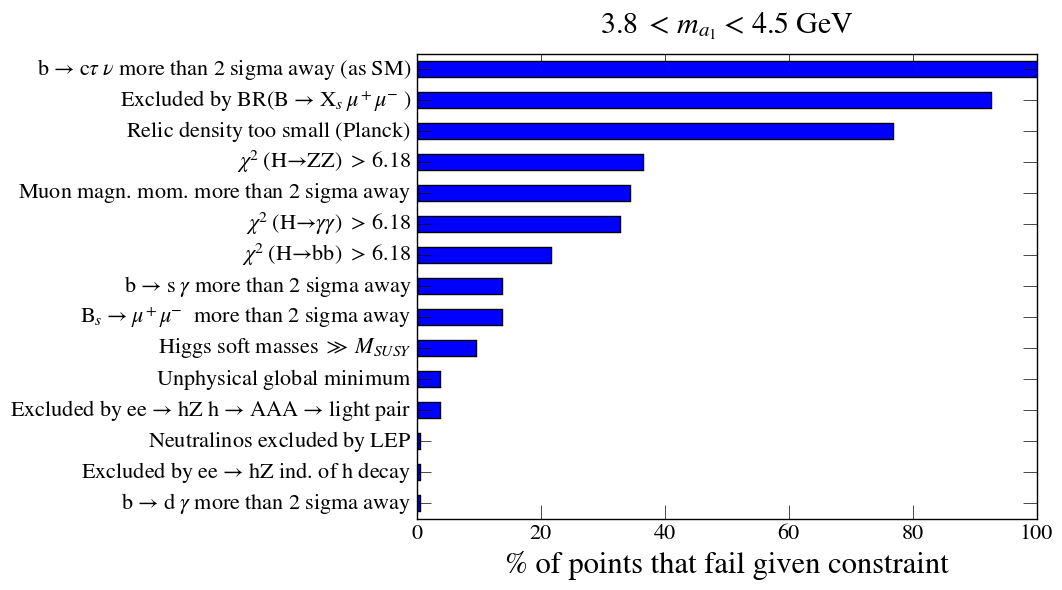

In [10]:
ax, vc_3p8 = plot_ma1_constraints(3.8, 4.5)

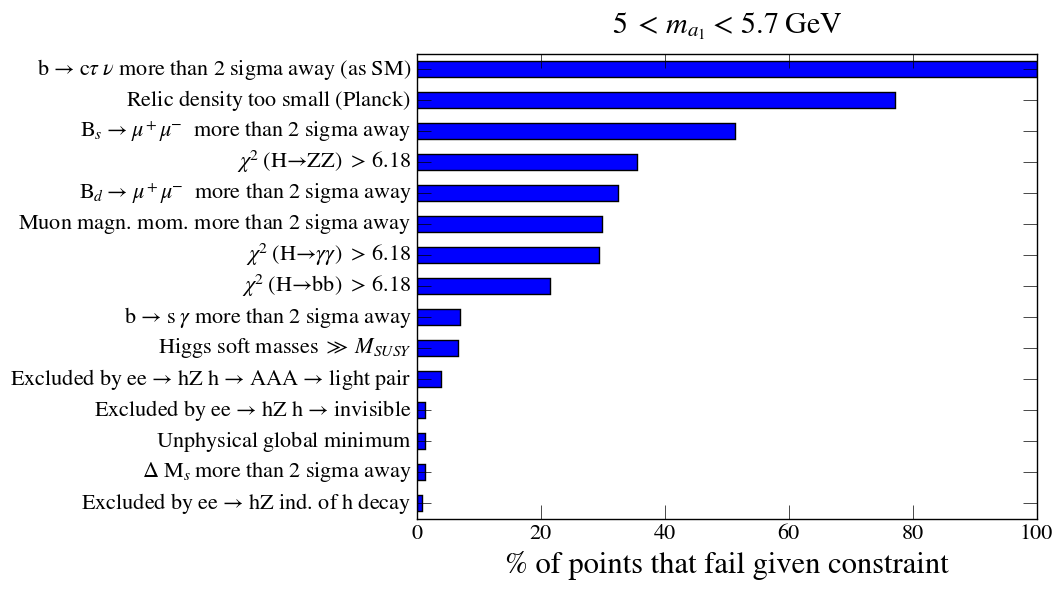

In [11]:
ax, vc_5 = plot_ma1_constraints(5, 5.7)

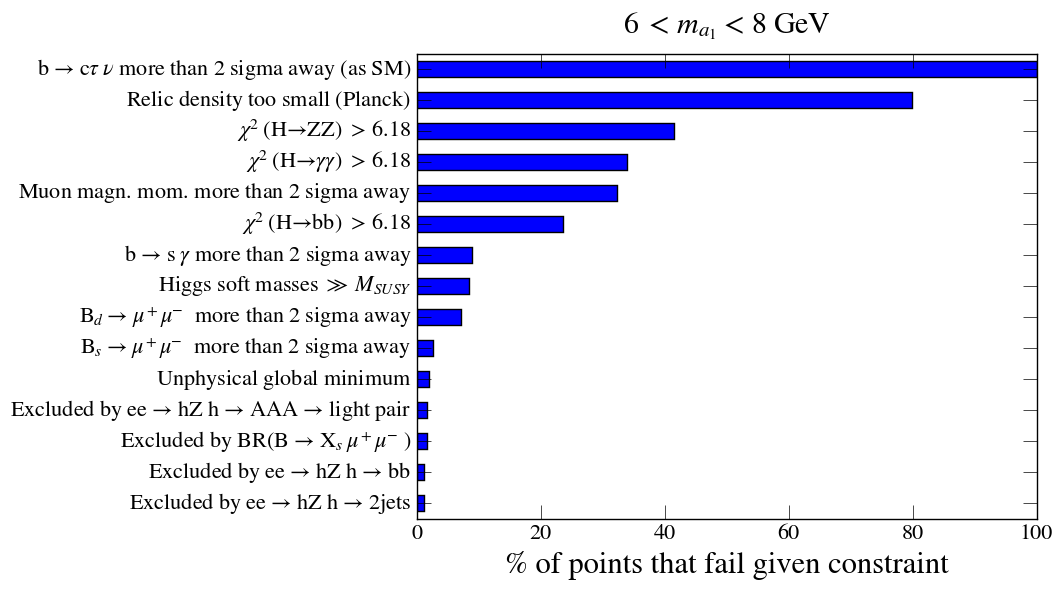

In [12]:
ax, vc_side = plot_ma1_constraints(6, 8)

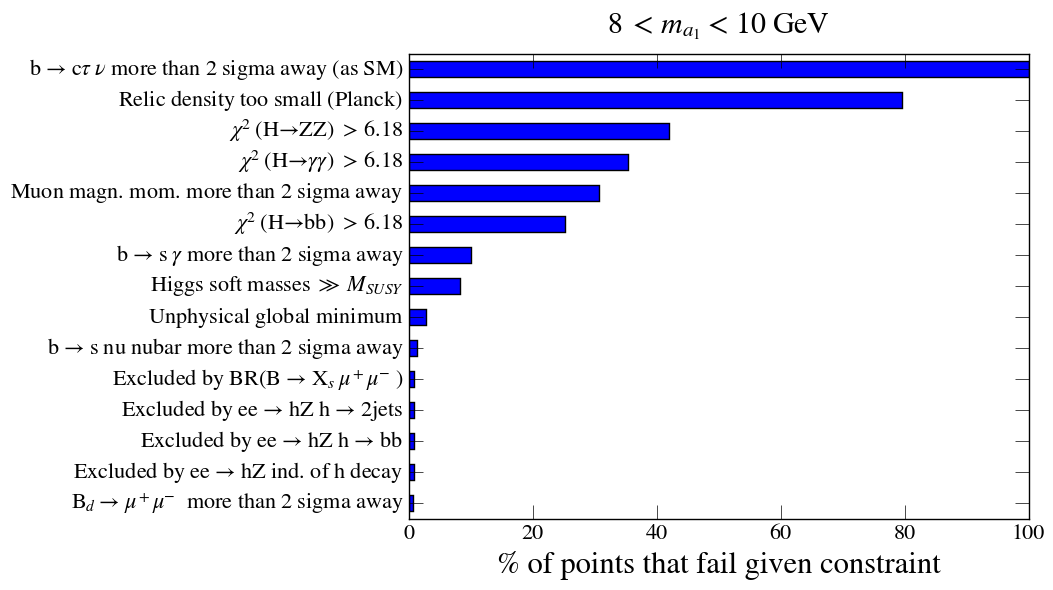

In [13]:
ax, vc_8 = plot_ma1_constraints(8, 10, n=20)

In [14]:
df_orig_1[df_orig_1.constraints.str.contains('Upsilon')].head()

,Bra1bb,Bra1cc,Bra1gg,Bra1mumu,Bra1ss,Bra1tautau,Brh1a1a1,Brh1a1z,Brh1bb,Brh1cc,Brh1gammagamma,Brh1gg,Brh1mumu,Brh1tautau,Brh1ww,Brh1zgamma,Brh1zz,Brh2a1a1,Brh2a1z,Brh2bb,Brh2gammagamma,Brh2gg,Brh2h1h1,Brh2tautau,Brh2ww,Brh2zgamma,Brh2zz,Del_a_mu,HBchannel,HBobsratio,HBresult,HS_10_chi2,HS_10_muPred,HS_11_chi2,HS_11_muPred,HS_12_chi2,HS_12_muPred,HS_13_chi2,HS_13_muPred,HS_14_chi2,HS_14_muPred,HS_15_chi2,HS_15_muPred,HS_16_chi2,HS_16_muPred,HS_17_chi2,HS_17_muPred,HS_18_chi2,HS_18_muPred,HS_19_chi2,HS_19_muPred,HS_1_chi2,HS_1_muPred,HS_20_chi2,HS_20_muPred,HS_21_chi2,HS_21_muPred,HS_22_chi2,HS_22_muPred,HS_23_chi2,HS_23_muPred,HS_24_chi2,HS_24_muPred,HS_25_chi2,HS_25_muPred,HS_26_chi2,HS_26_muPred,HS_27_chi2,HS_27_muPred,HS_28_chi2,HS_28_muPred,HS_29_chi2,HS_29_muPred,HS_2_chi2,HS_2_muPred,HS_30_chi2,HS_30_muPred,HS_31_chi2,HS_31_muPred,HS_32_chi2,HS_32_muPred,HS_33_chi2,HS_33_muPred,HS_34_chi2,HS_34_muPred,HS_35_chi2,HS_35_muPred,HS_36_chi2,HS_36_muPred,HS_37_chi2,HS_37_muPred,HS_38_chi2,HS_38_muPred,HS_39_chi2,HS_39_muPred,HS_3_chi2,HS_3_muPred,HS_40_chi2,HS_40_muPred,HS_41_chi2,...,xsec_ggf8_h1,xsec_ggf8_h2,xsec_ggf8_h3,xsec_vbf8_h1,xsec_vbf8_h2,xsec_vbf8_h3,xsec_scaled_ggf_h1_2a1_4b,xsec_13_ggf_h1_2a1_4b,xsec_8_ggf_h1_2a1_4b,xsec_scaled_ggf_h1_2a1_2b2tau,xsec_13_ggf_h1_2a1_2b2tau,xsec_8_ggf_h1_2a1_2b2tau,xsec_scaled_ggf_h1_2a1_2b2mu,xsec_13_ggf_h1_2a1_2b2mu,xsec_8_ggf_h1_2a1_2b2mu,xsec_scaled_ggf_h1_2a1_2tau2b,xsec_13_ggf_h1_2a1_2tau2b,xsec_8_ggf_h1_2a1_2tau2b,xsec_scaled_ggf_h1_2a1_4tau,xsec_13_ggf_h1_2a1_4tau,xsec_8_ggf_h1_2a1_4tau,xsec_scaled_ggf_h1_2a1_2tau2mu,xsec_13_ggf_h1_2a1_2tau2mu,xsec_8_ggf_h1_2a1_2tau2mu,xsec_scaled_ggf_h1_2a1_2mu2b,xsec_13_ggf_h1_2a1_2mu2b,xsec_8_ggf_h1_2a1_2mu2b,xsec_scaled_ggf_h1_2a1_2mu2tau,xsec_13_ggf_h1_2a1_2mu2tau,xsec_8_ggf_h1_2a1_2mu2tau,xsec_scaled_ggf_h1_2a1_4mu,xsec_13_ggf_h1_2a1_4mu,xsec_8_ggf_h1_2a1_4mu,xsec_scaled_ggf_h2_2a1_4b,xsec_13_ggf_h2_2a1_4b,xsec_8_ggf_h2_2a1_4b,xsec_scaled_ggf_h2_2a1_2b2tau,xsec_13_ggf_h2_2a1_2b2tau,xsec_8_ggf_h2_2a1_2b2tau,xsec_scaled_ggf_h2_2a1_2b2mu,xsec_13_ggf_h2_2a1_2b2mu,xsec_8_ggf_h2_2a1_2b2mu,xsec_scaled_ggf_h2_2a1_2tau2b,xsec_13_ggf_h2_2a1_2tau2b,xsec_8_ggf_h2_2a1_2tau2b,xsec_scaled_ggf_h2_2a1_4tau,xsec_13_ggf_h2_2a1_4tau,xsec_8_ggf_h2_2a1_4tau,xsec_scaled_ggf_h2_2a1_2tau2mu,xsec_13_ggf_h2_2a1_2tau2mu,xsec_8_ggf_h2_2a1_2tau2mu,xsec_scaled_ggf_h2_2a1_2mu2b,xsec_13_ggf_h2_2a1_2mu2b,xsec_8_ggf_h2_2a1_2mu2b,xsec_scaled_ggf_h2_2a1_2mu2tau,xsec_13_ggf_h2_2a1_2mu2tau,xsec_8_ggf_h2_2a1_2mu2tau,xsec_scaled_ggf_h2_2a1_4mu,xsec_13_ggf_h2_2a1_4mu,xsec_8_ggf_h2_2a1_4mu,xsec_scaled_ggf_h2_2h1_4b,xsec_13_ggf_h2_2h1_4b,xsec_8_ggf_h2_2h1_4b,xsec_scaled_ggf_h2_2h1_2b2tau,xsec_13_ggf_h2_2h1_2b2tau,xsec_8_ggf_h2_2h1_2b2tau,xsec_scaled_ggf_h2_2h1_2b2mu,xsec_13_ggf_h2_2h1_2b2mu,xsec_8_ggf_h2_2h1_2b2mu,xsec_scaled_ggf_h2_2h1_2tau2b,xsec_13_ggf_h2_2h1_2tau2b,xsec_8_ggf_h2_2h1_2tau2b,xsec_scaled_ggf_h2_2h1_4tau,xsec_13_ggf_h2_2h1_4tau,xsec_8_ggf_h2_2h1_4tau,xsec_scaled_ggf_h2_2h1_2tau2mu,xsec_13_ggf_h2_2h1_2tau2mu,xsec_8_ggf_h2_2h1_2tau2mu,xsec_scaled_ggf_h2_2h1_2mu2b,xsec_13_ggf_h2_2h1_2mu2b,xsec_8_ggf_h2_2h1_2mu2b,xsec_scaled_ggf_h2_2h1_2mu2tau,xsec_13_ggf_h2_2h1_2mu2tau,xsec_8_ggf_h2_2h1_2mu2tau,xsec_scaled_ggf_h2_2h1_4mu,xsec_13_ggf_h2_2h1_4mu,xsec_8_ggf_h2_2h1_4mu,pass_del_a_mu,pass_bctaunu,pass_relic,pass_chi2bb,pass_chi2zz,pass_chi2gg,pass_cms4mu,pass_h125,pass_relic_small,pass_relic_large,pass_HSHB,pass_NT,pass_strict


(<matplotlib.axes._subplots.AxesSubplot at 0x10a408550>,
 array([   0.,    5.,    3.,   12.,    8.,   15.,   13.,   14.,   17.,
          22.,   31.,   29.,   29.,   42.,   42.,   31.,   54.,   45.,
          54.,   54.,   45.,   65.,   57.,   77.,   61.,   59.,   66.,
          66.,   79.,   65.,   65.,   64.,   75.,   77.,   96.,   78.,
          92.,  117.,   75.,   99.,  111.,   97.,  115.,  105.,  109.,
         104.,  110.,   95.,  125.,  136.]),
 array([  0. ,   0.2,   0.4,   0.6,   0.8,   1. ,   1.2,   1.4,   1.6,
          1.8,   2. ,   2.2,   2.4,   2.6,   2.8,   3. ,   3.2,   3.4,
          3.6,   3.8,   4. ,   4.2,   4.4,   4.6,   4.8,   5. ,   5.2,
          5.4,   5.6,   5.8,   6. ,   6.2,   6.4,   6.6,   6.8,   7. ,
          7.2,   7.4,   7.6,   7.8,   8. ,   8.2,   8.4,   8.6,   8.8,
          9. ,   9.2,   9.4,   9.6,   9.8,  10. ]),
 <a list of 50 Patch objects>)

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


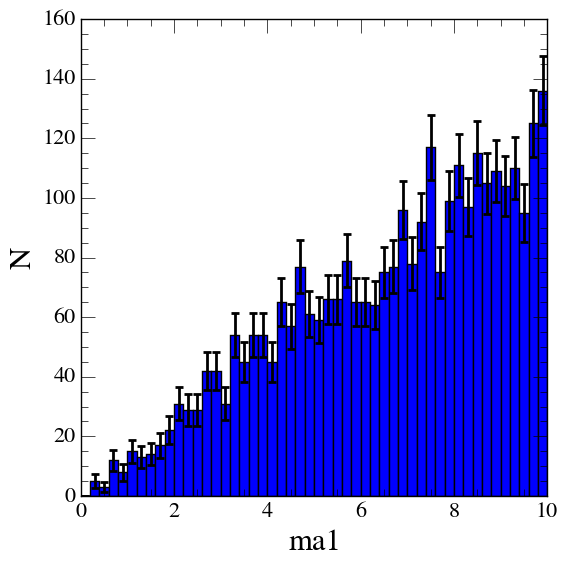

In [15]:
plot_histogram(df=df_orig_1.query('ma1<10 & pass_h125 & Del_a_mu>0 & pass_relic_large'), 
               var='ma1', bins=50, range=[0, 10])

In [16]:
col_names = ['3.8-4.5', '5-5.7', '6-8']
df_compare_fail = pd.concat({col_names[0]: vc_3p8, col_names[1]: vc_5, col_names[2]: vc_side}, axis=1).fillna(0)
df_compare_fail['Difference (3.8-4.5)'] = df_compare_fail[col_names[0]] - df_compare_fail[col_names[2]]
df_compare_fail['Difference (5-5.7)'] = df_compare_fail[col_names[1]] - df_compare_fail[col_names[2]]

In [17]:
df_compare_fail.sort_values('Difference (3.8-4.5)', ascending=False)

,3.8-4.5,5-5.7,6-8,Difference (3.8-4.5),Difference (5-5.7)
$\mathrm{Excluded\ by\ BR(B\ }\to\mathrm{\ X}_{s}\mathrm{\ }\mu^+\mu^-\mathrm{)}$,92.592593,0.877193,1.670644,9.092195e+01,-0.793451
$\mathrm{B}_{s}\mathrm{\ }\to\mathrm{\ }\mu^+\mu^-\mathrm{\ more\ than\ 2\ sigma\ away}$,13.756614,51.315789,2.625298,1.113132e+01,48.690491
$\mathrm{b\ }\to\mathrm{\ s\ }\gamma\mathrm{\ more\ than\ 2\ sigma\ away}$,13.756614,7.017544,8.830549,4.926065e+00,-1.813005
$\mathrm{Muon\ magn.\ mom.\ more\ than\ 2\ sigma\ away}$,34.391534,29.824561,32.219570,2.171964e+00,-2.395009
$\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ AAA\ }\to\mathrm{\ light\ pair}$,3.703704,3.947368,1.670644,2.033059e+00,2.276724
$\mathrm{Unphysical\ global\ minimum}$,3.703704,1.315789,2.028640,1.675064e+00,-0.712850
$\mathrm{Higgs\ soft\ masses\ }\gg\mathrm{\ }M_{SUSY}\mathrm{}$,9.523810,6.578947,8.472554,1.051256e+00,-1.893606
$\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ AA\ }\to\mathrm{\ 4taus}$,0.529101,0.000000,0.357995,1.711053e-01,-0.357995
$\mathrm{Neutralinos\ excluded\ by\ LEP}$,0.529101,0.438596,0.477327,5.177356e-02,-0.038730
$\mathrm{b\ }\to\mathrm{\ c}\tau\ \nu\mathrm{\ more\ than\ 2\ sigma\ away\ (as\ SM)}$,100.000000,100.000000,100.000000,1.421085e-14,0.000000


In [18]:
df_compare_fail.sort_values('Difference (5-5.7)', ascending=False)

,3.8-4.5,5-5.7,6-8,Difference (3.8-4.5),Difference (5-5.7)
$\mathrm{B}_{s}\mathrm{\ }\to\mathrm{\ }\mu^+\mu^-\mathrm{\ more\ than\ 2\ sigma\ away}$,13.756614,51.315789,2.625298,1.113132e+01,48.690491
$\mathrm{B}_{d}\mathrm{\ }\to\mathrm{\ }\mu^+\mu^-\mathrm{\ more\ than\ 2\ sigma\ away}$,0.000000,32.456140,7.159905,-7.159905e+00,25.296236
$\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ AAA\ }\to\mathrm{\ light\ pair}$,3.703704,3.947368,1.670644,2.033059e+00,2.276724
$\mathrm{}\Delta\mathrm{\ M}_{s}\mathrm{\ more\ than\ 2\ sigma\ away}$,0.000000,1.315789,0.000000,0.000000e+00,1.315789
$\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ invisible}$,0.000000,1.315789,0.715990,-7.159905e-01,0.599799
$\mathrm{}\Delta\mathrm{\ M}_{d}\mathrm{\ more\ than\ 2\ sigma\ away}$,0.000000,0.438596,0.000000,0.000000e+00,0.438596
$\mathrm{b\ }\to\mathrm{\ s\ nu\ nubar\ more\ than\ 2\ sigma\ away}$,0.000000,0.438596,0.119332,-1.193317e-01,0.319265
$\mathrm{b\ }\to\mathrm{\ d\ }\gamma\mathrm{\ more\ than\ 2\ sigma\ away}$,0.529101,0.877193,0.596659,-6.755818e-02,0.280534
$\mathrm{b\ }\to\mathrm{\ c}\tau\ \nu\mathrm{\ more\ than\ 2\ sigma\ away\ (as\ SM)}$,100.000000,100.000000,100.000000,1.421085e-14,0.000000
$\mathrm{Neutralinos\ excluded\ by\ LEP}$,0.529101,0.438596,0.477327,5.177356e-02,-0.038730


# Why no a1 < 2.5 GeV? 

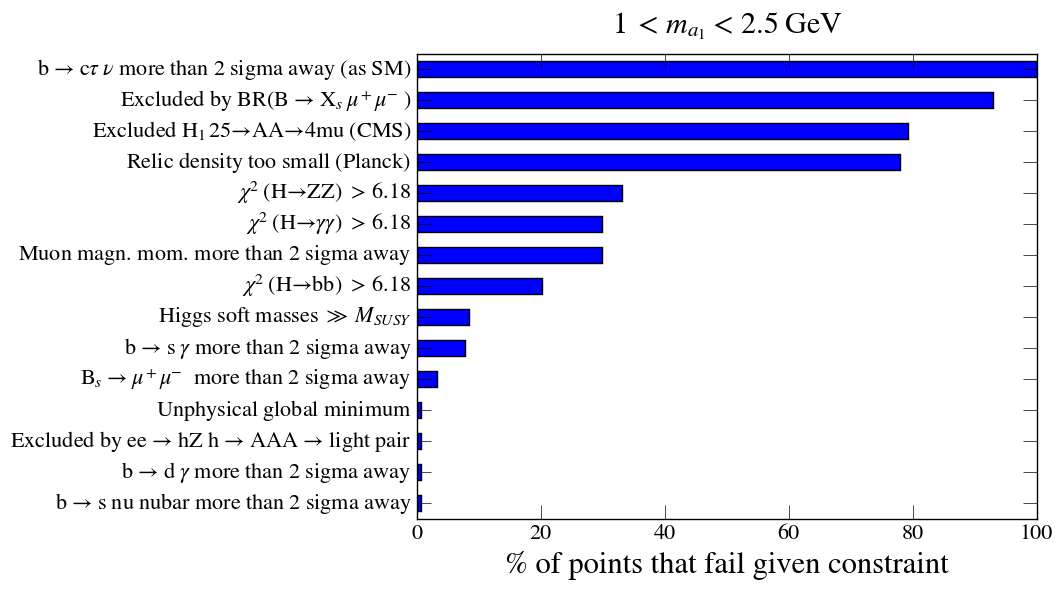

In [19]:
ax, vc_lt2p5 = plot_ma1_constraints(1, 2.5)

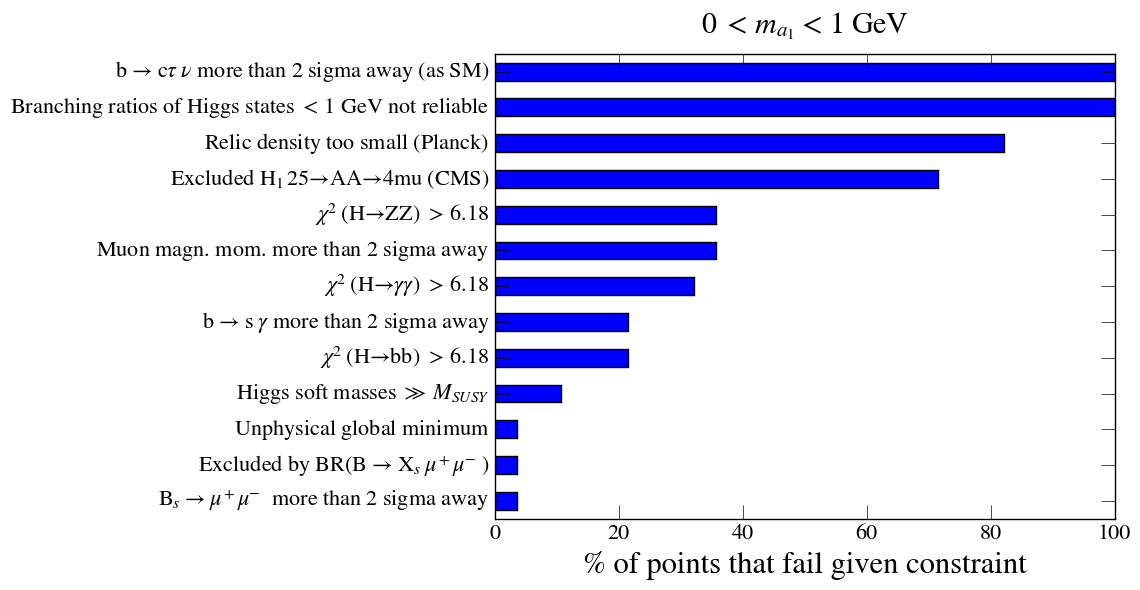

In [20]:
ax, vc_lt2p5 = plot_ma1_constraints(0, 1)

# Why a1 -> tautau ~ 0.8 - 0.9?

In [22]:
def plot_bra1_ma1(df, title):
    fig, ax = generate_fig_axes()
    SIZE=20
    plot_scatter(ax = ax, df=df, xvar='ma1', yvar='Bra1tautau', color='green', label=r'$\tau\tau$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1mumu', color='red', label=r'$\mu\mu$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1bb', color='blue', label=r'$b\bar{b}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1cc', color='orange', label=r'$c\bar{c}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1ss', color='fuchsia', label=r'$s\bar{s}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1gg', color='purple', label=r'$gg$', s=SIZE)
    plt.xlim(0, 25)
    plt.ylim(1E-3, 1.2)
    plt.yscale('log')
    plt.legend(loc='lower right', fontsize=16, framealpha=0.85)
    plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
    plt.ylabel(r'$BR(a_1 \to XX)$')
    plt.tight_layout()

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


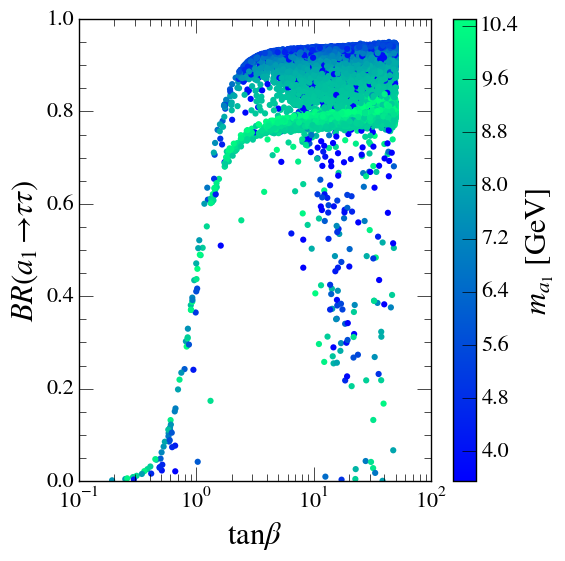

In [10]:
a, p = plot_scatter(df=df_orig_1.query('3.5<ma1<10.5'), xvar='tgbeta', yvar='Bra1tautau',
                    c=df_orig_1.query('3.5<ma1<10.5').ma1.values, cmap='winter', linewidth=0)
plt.xlabel(TGBETA_STR)
plt.ylabel(BR_A1_TAUTAU_STR)
plt.xscale('log')
plt.ylim(0, 1)
plt.colorbar(p, label=M_A1_STR)
plt.tight_layout()
plt.savefig('Thesis_plots_5_expCons/Couplings_BR/bra1tautau_tgBeta.png')

(<matplotlib.axes._subplots.AxesSubplot at 0x18e4c7450>,
 $\mathrm{b\ }\to\mathrm{\ c}\tau\ \nu\mathrm{\ more\ than\ 2\ sigma\ away\ (as\ SM)}$             100.000000
 $\mathrm{Muon\ magn.\ mom.\ more\ than\ 2\ sigma\ away}$                                          100.000000
 $\mathrm{No\ Higgs\ in\ the\ 122.1-128.1\ GeV\ mass\ range}$                                       98.461538
 $\mathrm{}\chi^2\mathrm{(H}\to\mathrm{ZZ)\ >\ 6.18}$                                               96.923077
 $\mathrm{}\chi^2\mathrm{(H}\to\gamma\gamma\mathrm{)\ >\ 6.18}$                                     85.384615
 $\mathrm{}\chi^2\mathrm{(H}\to\mathrm{bb)\ >\ 6.18}$                                               77.692308
 $\mathrm{Relic\ density\ too\ small\ (Planck)}$                                                    76.923077
 $\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ bb}$                                 61.538462
 $\mathrm{Landau\ Pole\ below\ }M_{GUT}\mathrm{}$              

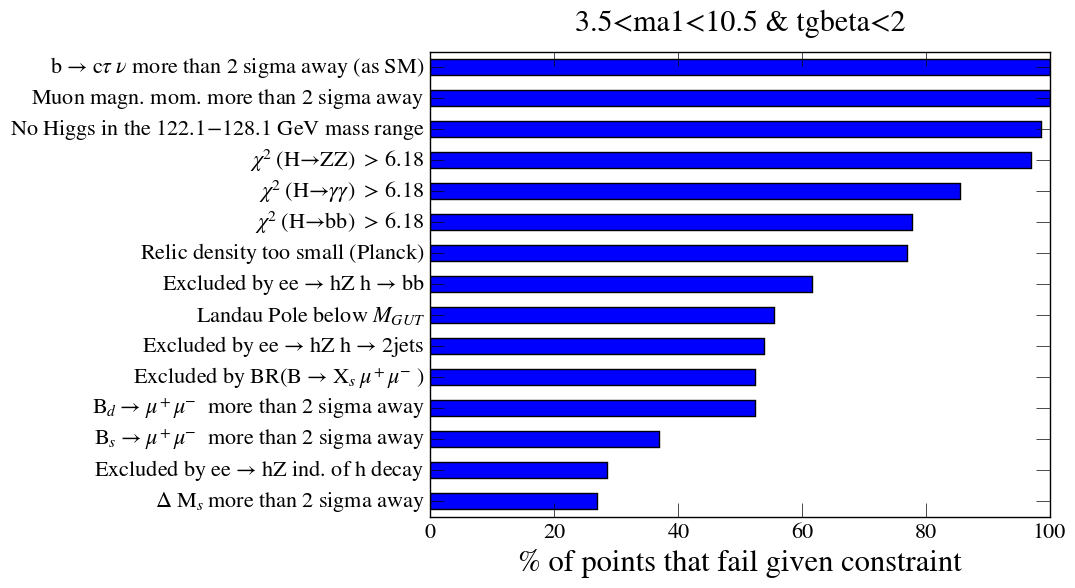

In [55]:
plot_constraints(df_orig_1.query('3.5<ma1<10.5 & tgbeta<2'), title='3.5<ma1<10.5 & tgbeta<2', num=15)

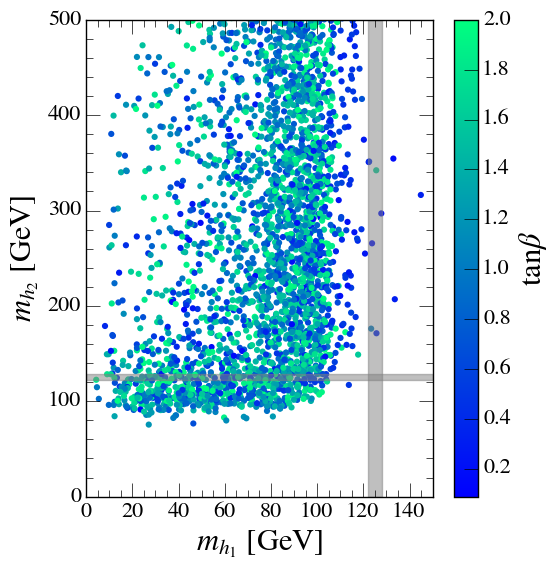

In [148]:
a, p = plot_scatter(df=df_orig_1.query('tgbeta<2'), xvar='mh1', yvar='mh2',
                   c=df_orig_1.query('tgbeta<2').tgbeta.values, cmap='winter', linewidth=0)
plt.colorbar(p, label=TGBETA_STR)
plt.xlim(0, 150)
plt.ylim(0, 500)
plt.xlabel(M_H1_STR)
plt.ylabel(M_H2_STR)
make_highlight_region(plt.gca(), [122.1, 128.1], 'x')
make_highlight_region(plt.gca(), [122.1, 128.1], 'y')
plt.savefig('Thesis_plots_5_expCons/Masses/mh1_mh2_smallTgBeta.png')

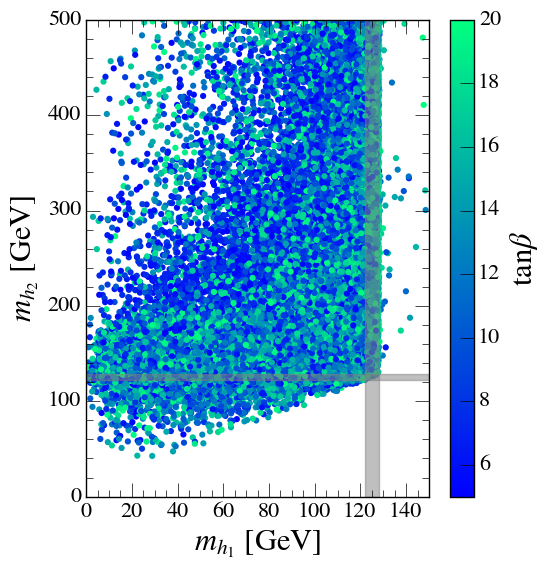

In [149]:
a, p = plot_scatter(df=df_orig_1.query('5<tgbeta<20'), xvar='mh1', yvar='mh2',
                   c=df_orig_1.query('5<tgbeta<20').tgbeta.values, cmap='winter', linewidth=0)
plt.colorbar(p, label=TGBETA_STR)
plt.xlim(0, 150)
plt.ylim(0, 500)
plt.xlabel(M_H1_STR)
plt.ylabel(M_H2_STR)
make_highlight_region(plt.gca(), [122.1, 128.1], 'x')
make_highlight_region(plt.gca(), [122.1, 128.1], 'y')
plt.savefig('Thesis_plots_5_expCons/Masses/mh1_mh2_largeTgBeta.png')

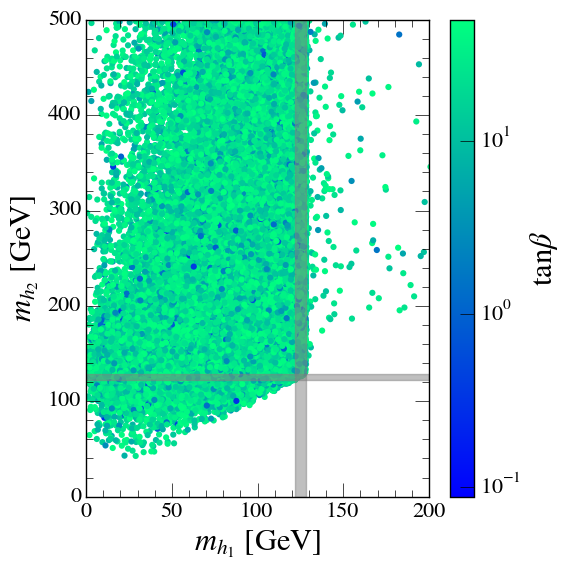

In [150]:
a, p = plot_scatter(df=df_orig_1.sort_values('tgbeta'), xvar='mh1', yvar='mh2',
                    c=df_orig_1.tgbeta.values, cmap='winter', 
                    linewidth=0, norm=LogNorm())
plt.colorbar(p, label=TGBETA_STR)
plt.xlim(0, 200)
plt.ylim(0, 500)
plt.xlabel(M_H1_STR)
plt.ylabel(M_H2_STR)
make_highlight_region(plt.gca(), [122.1, 128.1], 'x')
make_highlight_region(plt.gca(), [122.1, 128.1], 'y')
plt.savefig('Thesis_plots_5_expCons/Masses/mh1_mh2_allTgBeta.png')

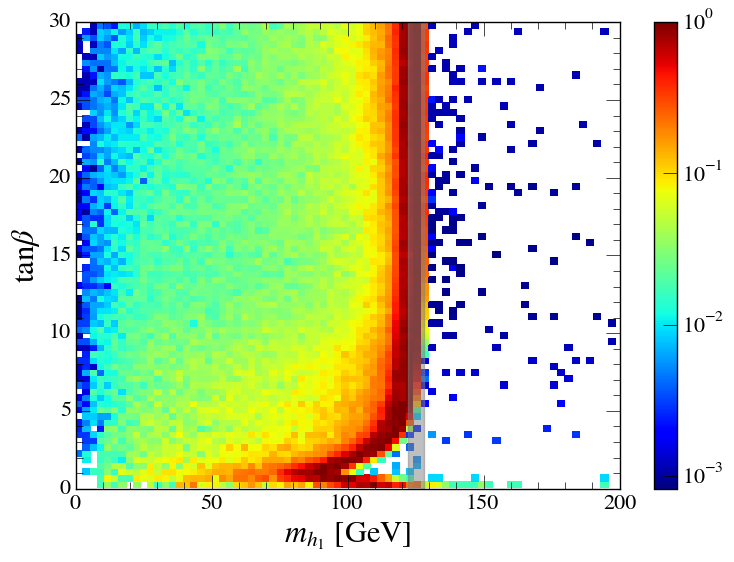

In [11]:
# plot_scatter(df=df_orig_1.query('tgbeta<200'), xvar='mh1', yvar='tgbeta')
_ = plot_histogram2d(df=df_orig_1.query('tgbeta<30 & mh1<200'), xvar='mh1', yvar='tgbeta', norm_axis='y', 
                     bins=[75,75], norm=LogNorm())
# plt.yscale('log')
# plt.ylim(0.1, 50)
plt.xlim(0,200)
plt.xlabel(M_H1_STR)
plt.ylabel(TGBETA_STR)
make_highlight_region(plt.gca(), [122.1, 128.1], 'x')
plt.tight_layout()
plt.savefig('Thesis_plots_5_expCons/Masses/mh1_tgBeta.png')

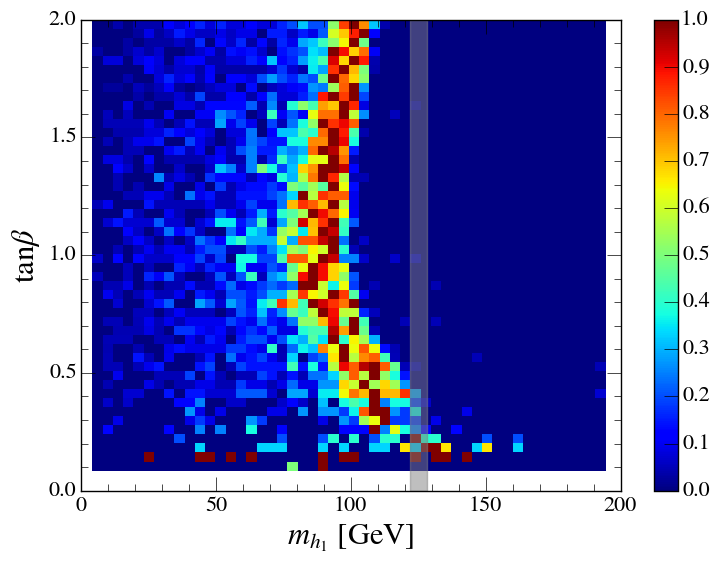

In [12]:
# plot_scatter(df=df_orig_1.query('tgbeta<200'), xvar='mh1', yvar='tgbeta')
_ = plot_histogram2d(df=df_orig_1.query('tgbeta<2 & mh1<200'), xvar='mh1', yvar='tgbeta', norm_axis='y', 
                     bins=[50,50])
# plt.yscale('log')
# plt.ylim(0.1, 50)
plt.xlim(0,200)
plt.xlabel(M_H1_STR)
plt.ylabel(TGBETA_STR)
make_highlight_region(plt.gca(), [122.1, 128.1], 'x')
plt.tight_layout()
plt.savefig('Thesis_plots_5_expCons/Masses/mh1_tgBeta_smalltgBeta.png')

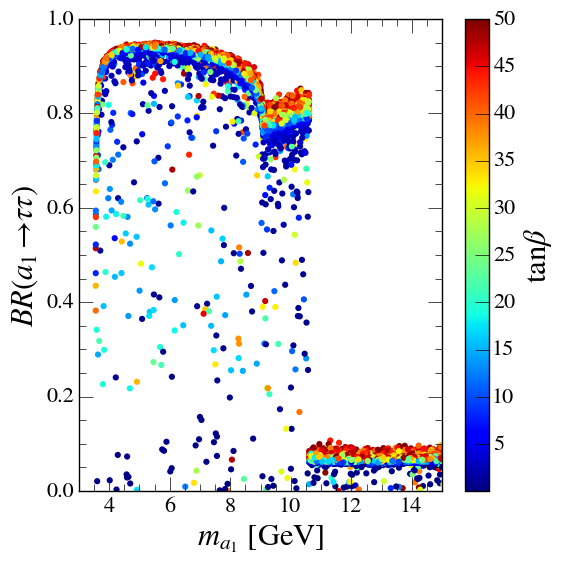

In [13]:
a, p = plot_scatter(df=df_orig_1, xvar='ma1', yvar='Bra1tautau', 
                    c=df_orig_1.tgbeta.values, cmap='jet', linewidth=0)
plt.colorbar(p, label=TGBETA_STR)
# plt.yscale('log')
plt.ylim(1E-3, 1)
plt.xlim(3, 15)
plt.xlabel(M_A1_STR)
plt.ylabel(BR_A1_TAUTAU_STR)
plt.tight_layout()
plt.savefig('Thesis_plots_5_expCons/Couplings_BR/bra1tautau_ma1_tgBeta.png')

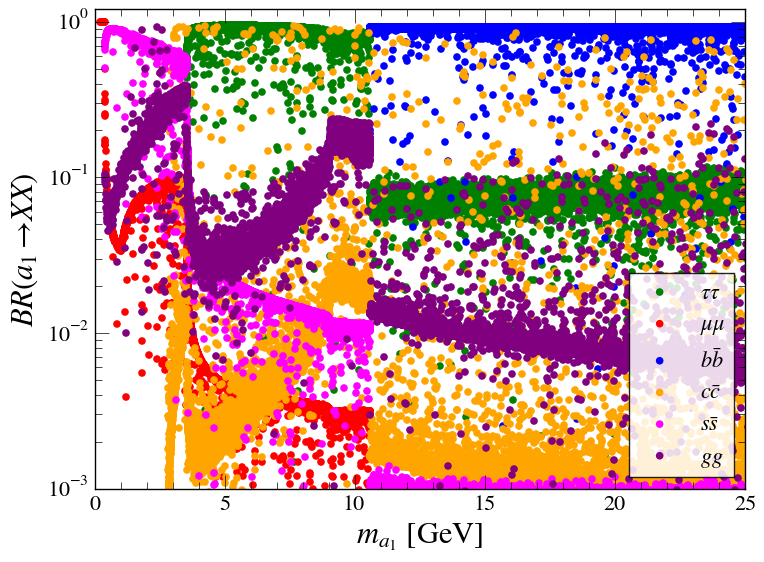

In [23]:
plot_bra1_ma1(df_orig_1, '')

# Low mass h1

(<matplotlib.axes._subplots.AxesSubplot at 0x1a6b3dd50>,
 $\mathrm{b\ }\to\mathrm{\ c}\tau\ \nu\mathrm{\ more\ than\ 2\ sigma\ away\ (as\ SM)}$       100.000000
 $\mathrm{Muon\ magn.\ mom.\ more\ than\ 2\ sigma\ away}$                                    100.000000
 $\mathrm{}\chi^2\mathrm{(H}\to\mathrm{ZZ)\ >\ 6.18}$                                        100.000000
 $\mathrm{}\chi^2\mathrm{(H}\to\gamma\gamma\mathrm{)\ >\ 6.18}$                               97.647059
 $\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ bb}$                           96.470588
 $\mathrm{}\chi^2\mathrm{(H}\to\mathrm{bb)\ >\ 6.18}$                                         94.117647
 $\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ 2jets}$                        92.941176
 $\mathrm{Relic\ density\ too\ large\ (Planck)}$                                              82.352941
 $\mathrm{Excluded\ by\ BR(B\ }\to\mathrm{\ X}_{s}\mathrm{\ }\mu^+\mu^-\mathrm{)}$            69.411765
 $\math

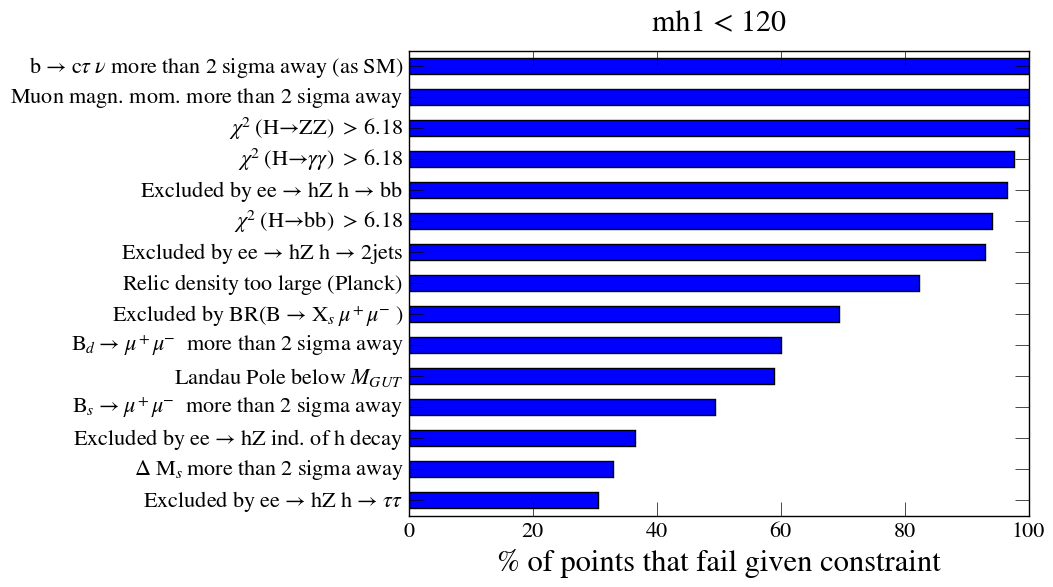

In [105]:
plot_constraints(df_orig_1.query('mh1<120 & pass_h125 & tgbeta<2'), 'mh1 < 120', num=15)

(-2e-10, 4e-09)

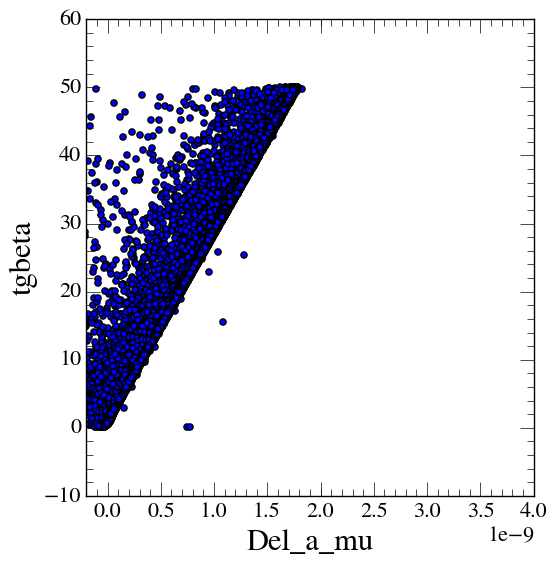

In [112]:
plot_scatter(df=df_orig_1, xvar='Del_a_mu', yvar='tgbeta')
plt.xlim(-0.2E-9, 4E-9)

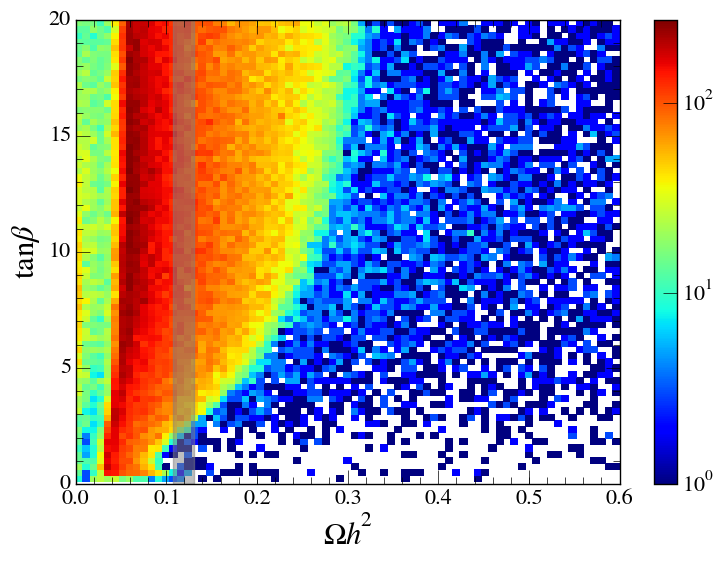

In [14]:
_ = plot_histogram2d(df=df_orig_1.dropna(subset=['omega']).query('omega<0.6 & tgbeta<20'), 
                     xvar='omega', yvar='tgbeta', bins=[75,75], norm=LogNorm(), norm_axis=None)
# plt.xlim(0, 1)
make_highlight_region(plt.gca(), OMEGA_LIM, 'x')
plt.xlabel(OMEGA_STR)
plt.ylabel(TGBETA_STR)
plt.tight_layout()
plt.savefig('Thesis_plots_5_expCons/Exp_Cons/tgBeta_omega.png')

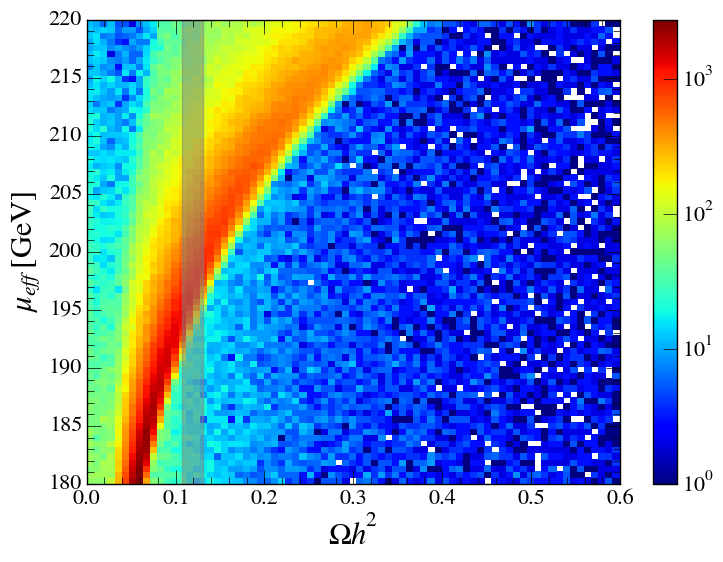

In [15]:
_ = plot_histogram2d(df=df_orig_1.dropna(subset=['omega']).query('omega<0.6'), 
                     xvar='omega', yvar='mueff', bins=[75,75], norm=LogNorm(), norm_axis=None)
# plt.xlim(0, 1)
make_highlight_region(plt.gca(), OMEGA_LIM, 'x')
plt.xlabel(OMEGA_STR)
plt.ylabel(MUEFF_STR)
plt.tight_layout()
plt.savefig('Thesis_plots_5_expCons/Exp_Cons/mueff_omega.png')

(<matplotlib.axes._subplots.AxesSubplot at 0x18a15b710>,
 $\mathrm{b\ }\to\mathrm{\ c}\tau\ \nu\mathrm{\ more\ than\ 2\ sigma\ away\ (as\ SM)}$             100.000000
 $\mathrm{Relic\ density\ too\ large\ (Planck)}$                                                    84.302646
 $\mathrm{Muon\ magn.\ mom.\ more\ than\ 2\ sigma\ away}$                                           61.714443
 $\mathrm{}\chi^2\mathrm{(H}\to\mathrm{ZZ)\ >\ 6.18}$                                               56.298236
 $\mathrm{}\chi^2\mathrm{(H}\to\gamma\gamma\mathrm{)\ >\ 6.18}$                                     48.869901
 $\mathrm{}\chi^2\mathrm{(H}\to\mathrm{bb)\ >\ 6.18}$                                               34.357773
 $\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ 2jets}$                              29.175854
 $\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ h\ }\to\mathrm{\ bb}$                                 28.031974
 $\mathrm{Excluded\ by\ ee\ }\to\mathrm{\ hZ\ ind.\ of\ h\ deca

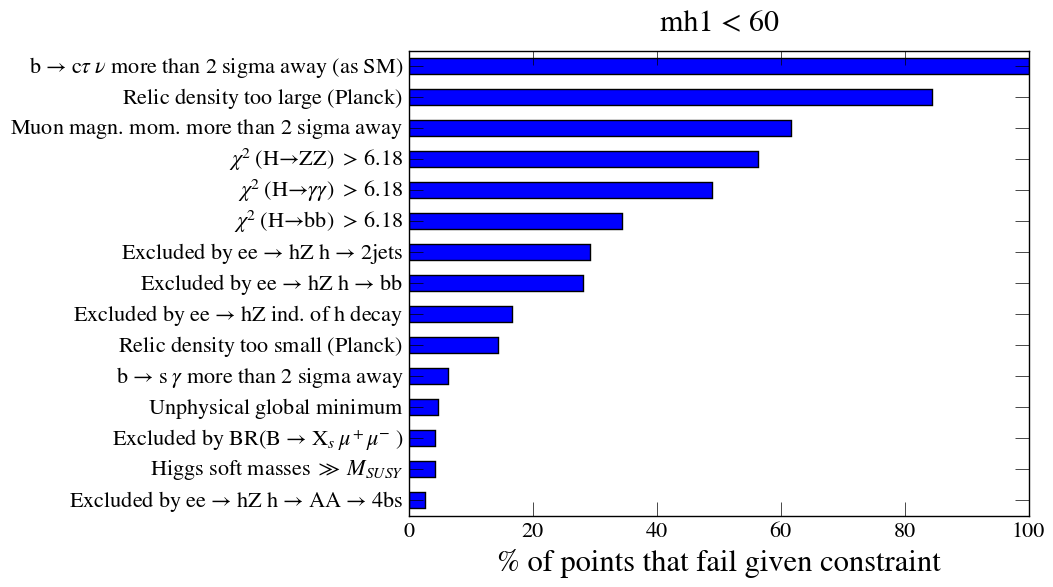

In [25]:
plot_constraints(df_orig_1.query('mh1<60 & pass_h125'), 'mh1 < 60', num=15)